In [2]:
import pandas as pd

1. 读取本地Meta股票csv数据

In [3]:
data = pd.read_csv('META stocks.csv')
pd.set_option('display.float_format', '{:,.3f}'.format) # 只显示小数点后三位的
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.050,45.000,38.000,38.230,38.085,573576400
1,2012-05-21,36.530,36.660,33.000,34.030,33.901,168192700
2,2012-05-22,32.610,33.590,30.940,31.000,30.882,101786600
3,2012-05-23,31.370,32.500,31.360,32.000,31.878,73600000
4,2012-05-24,32.950,33.210,31.770,33.030,32.904,50237200
...,...,...,...,...,...,...,...
3181,2025-01-13,607.100,608.970,598.450,608.330,608.330,10785000
3182,2025-01-14,605.070,605.490,588.550,594.250,594.250,13598000
3183,2025-01-15,610.210,622.460,606.500,617.120,617.120,15524300
3184,2025-01-16,611.500,616.250,609.710,611.300,611.300,8355300


2. 查看数据前三行

In [4]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.050,45.000,38.000,38.230,38.085,573576400
1,2012-05-21,36.530,36.660,33.000,34.030,33.901,168192700
2,2012-05-22,32.610,33.590,30.940,31.000,30.882,101786600


3. 查看每列数据缺失值情况

In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

4. 提取交易日期列含有空值的值

In [6]:
data['Date'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3181    False
3182    False
3183    False
3184    False
3185    False
Name: Date, Length: 3186, dtype: bool

5.输出每列缺失值具体行数

In [7]:
for column_name in data.columns:
    print(column_name)
    if data[column_name].count != len(data):
        loc = data[column_name][data[column_name].isnull().values==True].index.tolist()
        print(f'列名:"{column_name}"，第{loc}行位置缺失值')

Date
列名:"Date"，第[]行位置缺失值
Open
列名:"Open"，第[]行位置缺失值
High
列名:"High"，第[]行位置缺失值
Low
列名:"Low"，第[]行位置缺失值
Close
列名:"Close"，第[]行位置缺失值
Adj Close
列名:"Adj Close"，第[]行位置缺失值
Volume
列名:"Volume"，第[]行位置缺失值


6. 删除所有存在缺失值的行

In [8]:
data.dropna(axis=0, how='any', inplace=True)

7.绘制收盘价的折线图

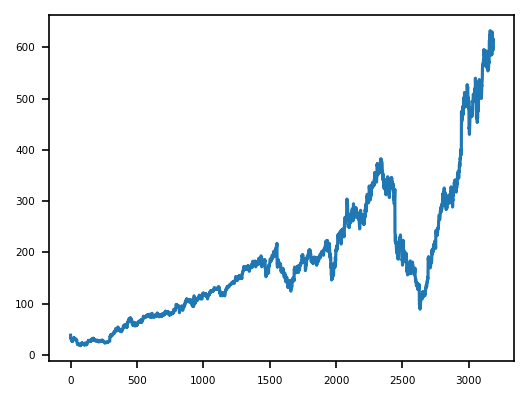

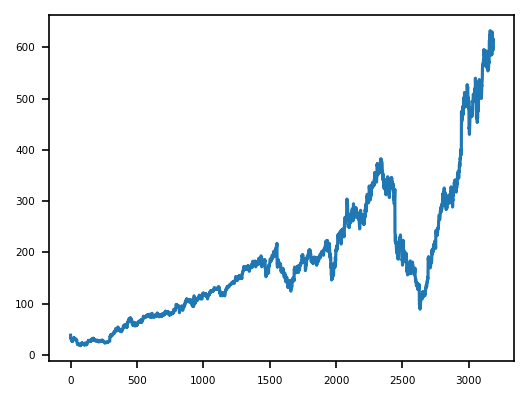

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=5)

plt.rc('figure', figsize=(4,3), dpi=150)

data['Close'].plot()
plt.show()

plt.plot(data['Close'])

8. 同时绘制开盘价和收盘价

<Axes: >

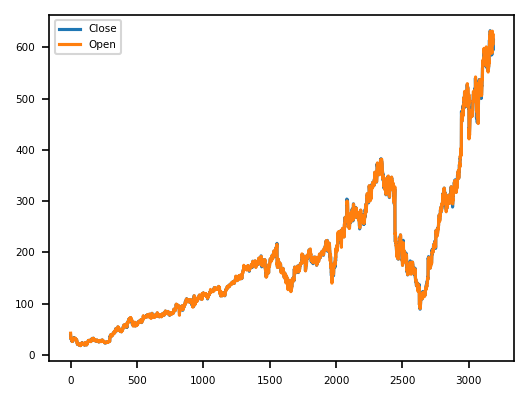

In [10]:
data[['Close','Open']].plot()

9.绘制振幅的直方图

(array([1.399e+03, 1.304e+03, 3.480e+02, 9.100e+01, 2.800e+01, 1.000e+01,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.37214935,  2.17703968,  3.98193001,  5.78682034,  7.59171066,
         9.39660099, 11.20149132, 13.00638165, 14.81127198, 16.6161623 ,
        18.42105263]),
 <BarContainer object of 10 artists>)

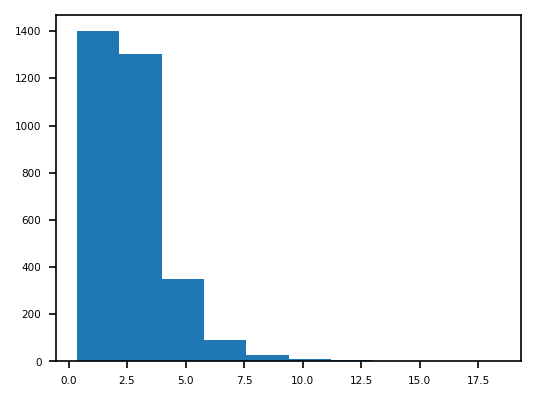

In [11]:
data['Amplitude'] = (data['High'] - data['Low']) / data['Low'] * 100
data

plt.hist(data['Amplitude'])

10. 让直方图更加细致

<Axes: >

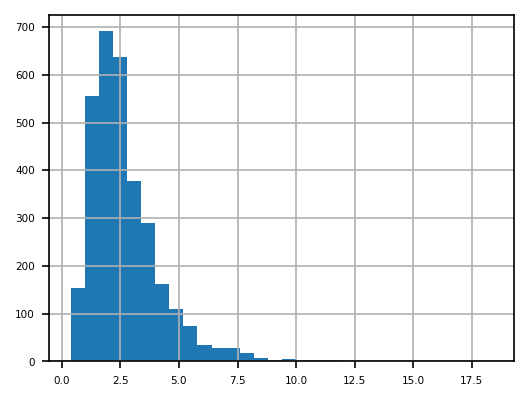

In [12]:
data['Amplitude'].hist(bins=30)

11. 以data的列名创建一个dataframe

In [13]:
temp = pd.DataFrame(columns=data.columns.to_list())
temp

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude


12. 打印所有成交量不是数字的行

In [14]:
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce') #Pandas数据转换时遇到不能转换的数据转为NaN的参数设置
rows = data[data['Volume'].isnull()]
rows

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude


13. 打印所有成交量为--的行

In [15]:
res_rows = data[data['Volume'] == '--']
res_rows

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude


14.重置data的行号

In [16]:
data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude
0,2012-05-18,42.050,45.000,38.000,38.230,38.085,573576400,18.421
1,2012-05-21,36.530,36.660,33.000,34.030,33.901,168192700,11.091
2,2012-05-22,32.610,33.590,30.940,31.000,30.882,101786600,8.565
3,2012-05-23,31.370,32.500,31.360,32.000,31.878,73600000,3.635
4,2012-05-24,32.950,33.210,31.770,33.030,32.904,50237200,4.533
...,...,...,...,...,...,...,...,...
3181,2025-01-13,607.100,608.970,598.450,608.330,608.330,10785000,1.758
3182,2025-01-14,605.070,605.490,588.550,594.250,594.250,13598000,2.878
3183,2025-01-15,610.210,622.460,606.500,617.120,617.120,15524300,2.631
3184,2025-01-16,611.500,616.250,609.710,611.300,611.300,8355300,1.073


15.删除所有最低价为非数字的行

In [17]:
# k = []
# for i in range(len(data)):
#     if type(data.iloc[i, 3]) != float:
#         k.append(i)
# print(data.drop(labels=k, inplace=True))

16.绘制成交量的密度曲线

<Axes: ylabel='Density'>

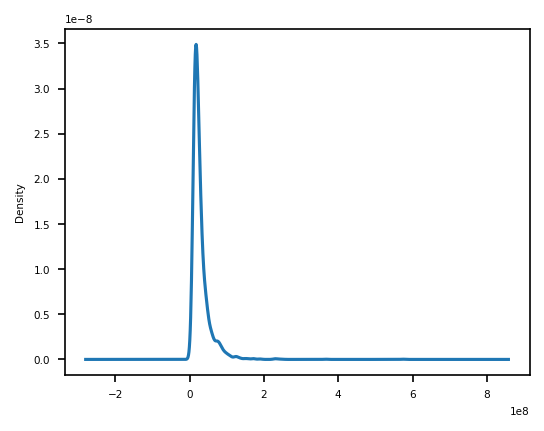

In [19]:
# data
data['Volume'].plot(kind='kde')

17.计算前一天和后一天收盘价的差值

In [20]:
data['Close'].diff() # diff()计算两条临近记录的差值

0          NaN
1       -4.200
2       -3.030
3        1.000
4        1.030
         ...  
3181    -7.530
3182   -14.080
3183    22.870
3184    -5.820
3185     1.470
Name: Close, Length: 3186, dtype: float64

18.计算前一天和后一天收盘价变化率

In [22]:
data['Close'].pct_change(fill_method=None)

0         NaN
1      -0.110
2      -0.089
3       0.032
4       0.032
        ...  
3181   -0.012
3182   -0.023
3183    0.038
3184   -0.009
3185    0.002
Name: Close, Length: 3186, dtype: float64

19.设置日期为索引

In [23]:
data.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume,Amplitude
Date,,,,,,,
2012-05-18,42.050,45.000,38.000,38.230,38.085,573576400,18.421
2012-05-21,36.530,36.660,33.000,34.030,33.901,168192700,11.091
2012-05-22,32.610,33.590,30.940,31.000,30.882,101786600,8.565
2012-05-23,31.370,32.500,31.360,32.000,31.878,73600000,3.635
2012-05-24,32.950,33.210,31.770,33.030,32.904,50237200,4.533
...,...,...,...,...,...,...,...
2025-01-13,607.100,608.970,598.450,608.330,608.330,10785000,1.758
2025-01-14,605.070,605.490,588.550,594.250,594.250,13598000,2.878
2025-01-15,610.210,622.460,606.500,617.120,617.120,15524300,2.631


20. 以5个数据作为一个数据滑动窗口，在这5个数据上取均值（收盘价）

In [24]:
data['Close'].rolling(5).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4       33.658
         ...  
3181   616.600
3182   609.410
3183   609.256
3184   609.372
3185   608.754
Name: Close, Length: 3186, dtype: float64

21. 以5个数据作为一个数据滑动窗口，计算这5个数据总和（收盘价）

In [25]:
data['Close'].rolling(5).sum()

0            NaN
1            NaN
2            NaN
3            NaN
4        168.290
          ...   
3181   3,083.000
3182   3,047.050
3183   3,046.280
3184   3,046.860
3185   3,043.770
Name: Close, Length: 3186, dtype: float64

22. 以收盘价5日均线、20日均线与原始数据绘制在同一图上

<Axes: >

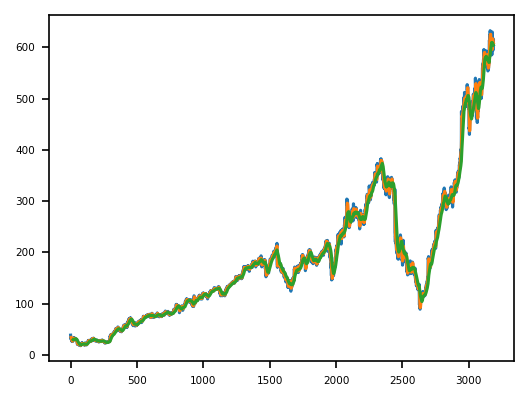

In [26]:
data['Close'].plot()
data['Close'].rolling(5).mean().plot()
data['Close'].rolling(20).mean().plot()

23.按周为采样规则，取一周收盘价最大值

In [27]:
data['Datetime'] = pd.to_datetime(data['Date'])
data.set_index('Datetime', inplace=True)
res_data2 = data['Close'].resample('W').max()
res_data2

Datetime
2012-05-20    38.230
2012-05-27    34.030
2012-06-03    29.600
2012-06-10    27.100
2012-06-17    30.010
               ...  
2024-12-22   624.240
2024-12-29   607.750
2025-01-05   604.630
2025-01-12   630.200
2025-01-19   617.120
Freq: W-SUN, Name: Close, Length: 662, dtype: float64

24. 绘制重采样数据与原始数据

<Axes: xlabel='Datetime'>

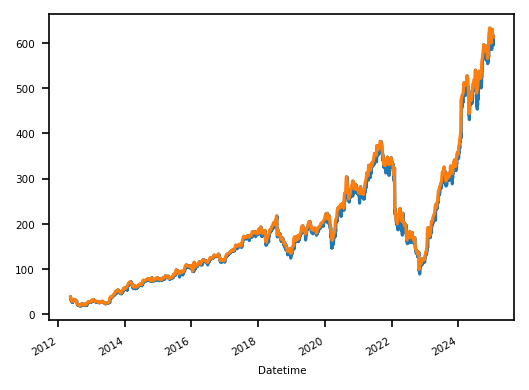

In [29]:
data['Close'].plot()
data['Close'].resample('7D').max().plot()

25. 将数据往后移动5天

In [30]:
data.shift(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Amplitude
Datetime,,,,,,,,
2012-05-18,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-13,2025-01-03,604.760,609.500,596.410,604.630,604.630,"11,436,800.000",2.195
2025-01-14,2025-01-06,611.830,630.990,605.620,630.200,630.200,"14,560,800.000",4.189
2025-01-15,2025-01-07,631.700,632.100,608.230,617.890,617.890,"12,071,500.000",3.925


In [ ]:
# 中文报错方法
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_min'] = False